# 로지스틱 회귀
* 확률로 제시하는 분류 2진 모델
* 사이킷런에서는 2진 분류 모델을 확장하여 다중 분류까지 지원

### 데이터 준비하기

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish.shape

(159, 6)

In [3]:
fish.to_csv('4_1_fishes_logistic.csv', mode='w', index=False)

In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

### 표준화모듈을 활용한 데이터표준화

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 모델에서 학습한 분류 클래스 종류

In [17]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


### 분류클래스 별 예측확률

In [19]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [20]:
test_scaled[3:4] # index 3행의 2차원 배열

array([[-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464]])

In [21]:
# test_scaled[3]과 같은 데이터이나 2차원형태로 입력하기 위해 slicing 사용
distances, indexes = kn.kneighbors(test_scaled[3:4]) 
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
### 회귀식을 시그모이드 함수를 거쳐 확률로 변환

### 회귀식 예)

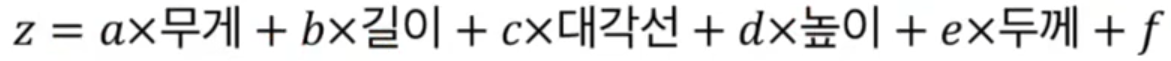

### 시그모이드 함수 (Sigmoid Function)

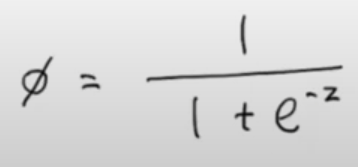

### 확률 변환

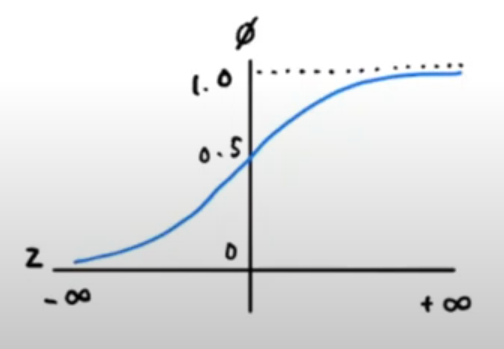

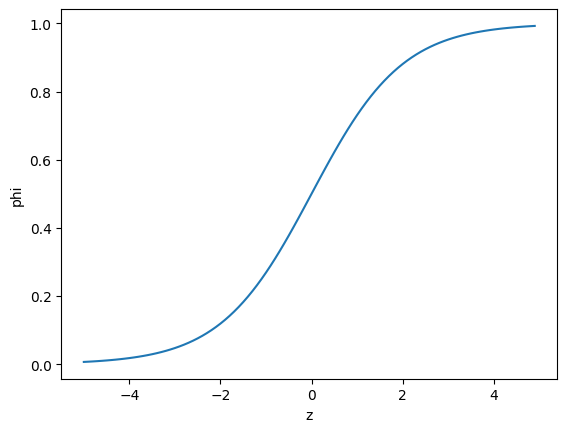

In [22]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [23]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [24]:
train_target[:15]

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch'], dtype=object)

In [25]:
train_target.shape

(119,)

In [26]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes[:15]

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False])

In [27]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [28]:
train_bream_smelt.shape, target_bream_smelt.shape

((33, 5), (33,))

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [30]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [31]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [32]:
print(lr.classes_)

['Bream' 'Smelt']


### 로지스틱 회귀계수 확인

In [33]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


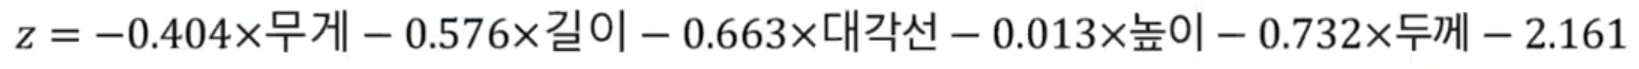

### decision function
* 회귀식의 결과(z)를 반환

In [99]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [121]:
from scipy.special import expit

# expit함수 => 시그모이드 함수
print(lr.predict(train_bream_smelt[:5]))
print(expit(decisions))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [101]:
# max_iter: 학습데이터 반복횟수, 기본값은 100이고 100으로 수행시 적다고 warning이 발생하여 값을 조정
# C: L2 규제 적용시 규제 강도를 설정하는 하이퍼파라메터
# 선형회귀의 alpha 값과 달리 작을 수록 규제가 커짐, 규제를 완화하기 위하여 값을 수정 
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [102]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [103]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [104]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [105]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [106]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


### softmax 함수
* 다중 분류일 경우 전통적인 Logistic 모델을 적용할 경우 N개의 클래스의 경우 N개의 Logistic 모델의 조합을 구성해야 한다.
* 이를 개선한 방식이 다중 클래스의 확률을 변환하는 softmax 알고리즘을 활용한다.

In [123]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(lr.predict(test_scaled[:5]))
print(lr.classes_)
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 다중 클래스의 예측결과를 확률로 변환하는 과정

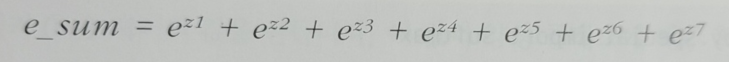

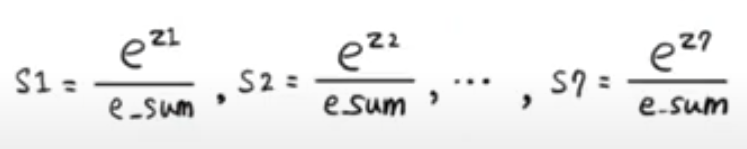